In [1]:
import pandas as pd
import numpy as np
data_frame=pd.read_excel(r"Lab Session1 Data.xlsx",sheet_name='Purchase data')
data_frame.drop(data_frame.iloc[:,5:22],inplace=True,axis=1)
A=np.array(data_frame.iloc[:,1:-1].values)
C=np.array(data_frame.iloc[:,-1].values)
print("Matrix A:-")
print(A)
print("Matrix C:-")
print(C)
print("Rank of Matrix A:-",np.linalg.matrix_rank(A))
print("Rank of Matrix C:-",np.linalg.matrix_rank(C))

Matrix A:-
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:-
[386 289 393 110 280 167 271 274 148 198]
Rank of Matrix A:- 3
Rank of Matrix C:- 1


In [3]:
inverse=np.linalg.pinv(A)
print("Inverse Matrix of A:-",inverse)
Pseudo_inv=np.matmul(inverse,C)
print("Pseudo inverse is  actual cost of each product is : ",Pseudo_inv)

Inverse Matrix of A:- [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
Pseudo inverse is  actual cost of each product is :  [ 1. 55. 18.]


In [4]:
table=np.array(data_frame['Payment (Rs)'])
number=len(table)
new_row=[]
for i in range(0,number):
    if table[i]>200:
        new_row.append("RICH")
    else:
        new_row.append("POOR")
data_frame.insert(loc = 5,column = 'Label',value = new_row)
print("New Data Excel Sheet for Purchase Data is:-")
print(data_frame)

New Data Excel Sheet for Purchase Data is:-
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Label
0      C_1           20             6                 2           386  RICH
1      C_2           16             3                 6           289  RICH
2      C_3           27             6                 2           393  RICH
3      C_4           19             1                 2           110  POOR
4      C_5           24             4                 2           280  RICH
5      C_6           22             1                 5           167  POOR
6      C_7           15             4                 2           271  RICH
7      C_8           18             4                 2           274  RICH
8      C_9           21             1                 4           148  POOR
9     C_10           16             2                 4           198  POOR


In [7]:
X = data_frame.drop(['Customer', 'Payment (Rs)', 'Label'], axis=1)
y = data_frame["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         1
        RICH       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [8]:
import pandas as pd
import numpy as np
import statistics as sp
import matplotlib.pyplot as plt
data = pd.read_excel("Lab Session1 Data.xlsx", sheet_name='IRCTC Stock Price')
p_data = data['Price']
m_price = sp.mean(p_data)
v_price = sp.variance(p_data)
print("The mean value of the Prices is:-", m_price)
print("The Variance is:-", v_price)



The mean value of the Prices is:- 1560.663453815261
The Variance is:- 58732.365352539186


In [9]:

data['Date'] = pd.to_datetime(data['Date'])

wednesday_data = data[data['Date'].dt.day_name() == 'Wednesday']
sample_mean_wednesday = sp.mean(wednesday_data['Price'])

print("Sample mean on Wednesdays:-", sample_mean_wednesday)
print("Population mean (overall mean):-", m_price)

Sample mean on Wednesdays:- 1550.706
Population mean (overall mean):- 1560.663453815261


In [10]:
april_data = data[data['Date'].dt.month == 4]
sample_mean_april = sp.mean(april_data['Price'])

print("Sample mean in April:-", sample_mean_april)

loss_probability = len(data[data['Chg%'] < 0]) / len(data)

print("Probability of making a loss over the stock:-", loss_probability)


profit_on_wednesday_probability = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)

print("Probability of making a profit on Wednesday:--", profit_on_wednesday_probability)


Sample mean in April:- 1698.9526315789474
Probability of making a loss over the stock:- 0.4979919678714859
Probability of making a profit on Wednesday:-- 0.42


Conditional probability of making profit on Wednesday:- 0.42


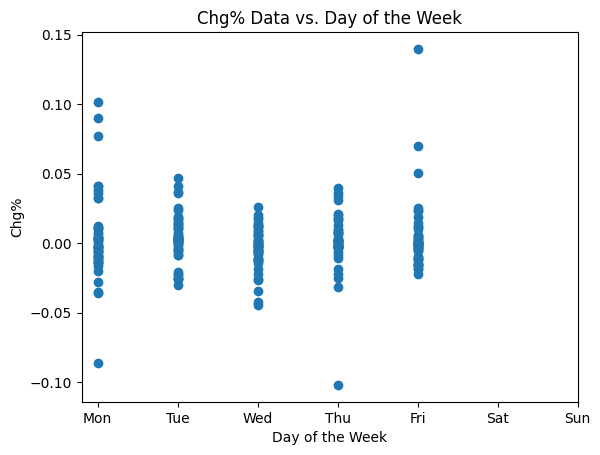

In [11]:
conditional_profit_probability = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data)

print("Conditional probability of making profit on Wednesday:-", conditional_profit_probability)

plt.scatter(data['Date'].dt.weekday, data['Chg%'])
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Chg% Data vs. Day of the Week")
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
